In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 2s 1us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [9]:
# Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [10]:
# Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [13]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# Training your model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.5093 - acc: 0.7861 - val_loss: 0.3949 - val_acc: 0.8596
Epoch 2/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.3037 - acc: 0.9059 - val_loss: 0.3103 - val_acc: 0.8856
Epoch 3/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.2227 - acc: 0.9303 - val_loss: 0.2825 - val_acc: 0.8878
Epoch 4/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1780 - acc: 0.9432 - val_loss: 0.2907 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1448 - acc: 0.9543 - val_loss: 0.3028 - val_acc: 0.8798
Epoch 6/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1218 - acc: 0.9622 - val_loss: 0.2897 - val_acc: 0.8857
Epoch 7/20
15000/15000 [==============================] - 1s 65us/step - loss: 0.0990 - acc: 0.9707 - val_loss: 0.3129 - val_acc

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

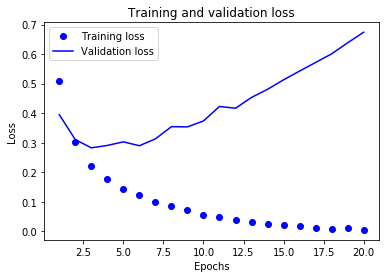

In [17]:
#  Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

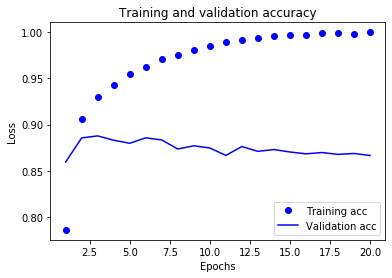

In [19]:
# Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [21]:
model.predict(x_test)

array([[0.19823182],
       [0.9998584 ],
       [0.91533124],
       ...,
       [0.12476358],
       [0.08652831],
       [0.7110226 ]], dtype=float32)

**5.2 Implement the news classifier**

In [22]:
# Loading the Reuters dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [23]:
print(len(train_data))


8982

In [24]:
len(test_data)

2246

In [25]:
 train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [26]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [27]:
train_labels[10]

3

In [29]:
# Preparing the data
# Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [32]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [33]:
#  Building your network
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [34]:
# Compiling the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [35]:
# Validating your approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [36]:
#  Training the model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 81us/step - loss: 2.7136 - accuracy: 0.5133 - val_loss: 1.7827 - val_accuracy: 0.6450
Epoch 2/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.4502 - accuracy: 0.7028 - val_loss: 1.3037 - val_accuracy: 0.7140
Epoch 3/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.0500 - accuracy: 0.7777 - val_loss: 1.1212 - val_accuracy: 0.7500
Epoch 4/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.8213 - accuracy: 0.8254 - val_loss: 1.0552 - val_accuracy: 0.7830
Epoch 5/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.6550 - accuracy: 0.8657 - val_loss: 0.9575 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.5243 - accuracy: 0.8930 - val_loss: 0.9628 - val_accuracy: 0.7910
Epoch 7/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.421

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

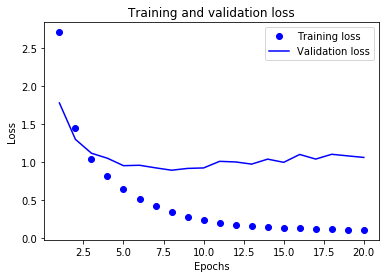

In [37]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

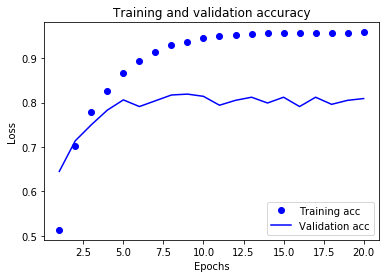

In [41]:
#  Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 72us/step - loss: 2.6934 - accuracy: 0.5175 - val_loss: 1.7424 - val_accuracy: 0.6640
Epoch 2/9
7982/7982 [==============================] - 0s 58us/step - loss: 1.4328 - accuracy: 0.7031 - val_loss: 1.2964 - val_accuracy: 0.7140
Epoch 3/9
7982/7982 [==============================] - 0s 57us/step - loss: 1.0519 - accuracy: 0.7680 - val_loss: 1.1127 - val_accuracy: 0.7560
Epoch 4/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.8246 - accuracy: 0.8205 - val_loss: 1.0115 - val_accuracy: 0.7880
Epoch 5/9
7982/7982 [==============================] - 0s 55us/step - loss: 0.6546 - accuracy: 0.8608 - val_loss: 0.9445 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 0s 59us/step - loss: 0.5216 - accuracy: 0.8875 - val_loss: 0.9097 - val_accuracy: 0.8200
Epoch 7/9
7982/7982 [==============================] - 0s 55us/step - loss: 0.4169 - acc

In [43]:
results

[0.9984570243798083, 0.7804986834526062]

In [46]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18699910952804988

In [49]:
# Generating predictions for new data
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
np.argmax(predictions[0])

(46,)
1.0


3

In [51]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [52]:
# A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 101us/step - loss: 2.8468 - accuracy: 0.4585 - val_loss: 2.1370 - val_accuracy: 0.5520
Epoch 2/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.7485 - accuracy: 0.5968 - val_loss: 1.6169 - val_accuracy: 0.6190
Epoch 3/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.3477 - accuracy: 0.6694 - val_loss: 1.4392 - val_accuracy: 0.6720
Epoch 4/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.1414 - accuracy: 0.7279 - val_loss: 1.3432 - val_accuracy: 0.7010
Epoch 5/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.0174 - accuracy: 0.7472 - val_loss: 1.3111 - val_accuracy: 0.6990
Epoch 6/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.9263 - accuracy: 0.7607 - val_loss: 1.2977 - val_accuracy: 0.7090
Epoch 7/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.84

**Implement the housing price regression model**

In [29]:
# Loading the Boston housing dataset
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [30]:
print(train_data.shape)
print(test_data.shape)
# print( train_targets)

(404, 13)
(102, 13)


In [31]:
# Preparing the data
#  Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [32]:
# Building your network
# Model definition
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [33]:
# K-fold validation
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [34]:
all_scores

[2.4368655681610107, 2.3042304515838623, 2.7090537548065186, 2.388155937194824]

In [35]:
np.mean(all_scores)

2.459576427936554

In [36]:
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    history_dict = history.history
#     print(history_dict.keys())
#     mae_history = history.history['val_mean_absolute_error']
    mae_history=history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [37]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

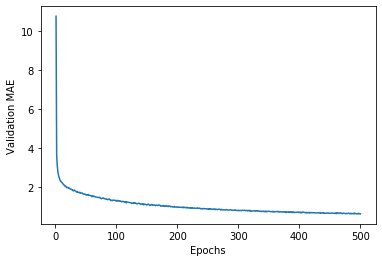

In [38]:
# Plotting validation scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

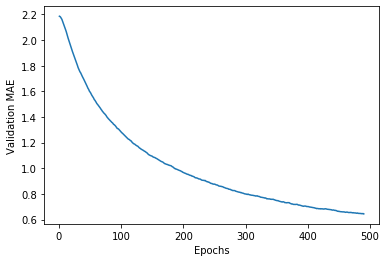

In [27]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [28]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 109us/step


2.7512903213500977